# Lending Case Study Data exploration

In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data and print few rows
lending_case = pd.read_csv("/Users/nyashasingh/Desktop/upgrad/upgrad-case-studies-solutions/lending-case-study/loan.csv")
lending_case.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check number of rows and columns, validate columns with higher null values
print("Rows and column :: ", lending_case.shape)

Rows and column ::  (39717, 111)


## Data Cleaning, Fixing columns and rows
1. Remove column with NA or NAN values and
2. Remove rows having more than x% of column values with zero values or values not avaiable

In [4]:
#check the columns with all the values and missing and drop them
columns_to_drop = lending_case.columns[lending_case.isna().all()].tolist()
lending_case = lending_case.drop(columns = columns_to_drop)
print("Shape after dropping columns with all missing values :: ", lending_case.shape)

Shape after dropping columns with all missing values ::  (39717, 57)


#### Function to print missing values to be used  

In [5]:
#Function to print data frame stats where columns has missing value greater than zero
def print_columns_with_missing_value(df_table):
    missing_values_column = df_table.isnull().sum().to_frame('missing_values')
    print(missing_values_column[missing_values_column.missing_values > 0])

In [6]:
#check columns with missing values
print_columns_with_missing_value(lending_case)  
#Should we drop the columns blindly where it has more than 70% missing value, 
#blindly drop them#df[df.missing_values > len(lending_case.index) * 0.70]

                            missing_values
emp_title                             2459
emp_length                            1075
desc                                 12940
title                                   11
mths_since_last_delinq               25682
mths_since_last_record               36931
revol_util                              50
last_pymnt_d                            71
next_pymnt_d                         38577
last_credit_pull_d                       2
collections_12_mths_ex_med              56
chargeoff_within_12_mths                56
pub_rec_bankruptcies                   697
tax_liens                               39


#### Drop column with missing rows and and of no importance

In [7]:
#drop columns
columns_to_drop = ['emp_title', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
lending_case = lending_case.drop(columns = columns_to_drop)
print("Shape after dropping additional columns :: ", lending_case.shape)

#drop columns with no imp. Note: tax_liens is garbage columns
columns_with_no_imp = ['member_id', 'url', 'desc', 'zip_code', 'tax_liens']
lending_case = lending_case.drop(columns = columns_with_no_imp)
print("Shape after dropping columns with no importance :: ", lending_case.shape)

Shape after dropping additional columns ::  (39717, 53)
Shape after dropping columns with no importance ::  (39717, 48)


In [8]:
#check again columns with missing values
print_columns_with_missing_value(lending_case)    

                            missing_values
emp_length                            1075
title                                   11
revol_util                              50
last_pymnt_d                            71
last_credit_pull_d                       2
collections_12_mths_ex_med              56
chargeoff_within_12_mths                56
pub_rec_bankruptcies                   697


In [9]:
#Drop additional columns as its not needed, out purpose is determine before loan sactioned
additional_colums_to_drop = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt']
lending_case = lending_case.drop(columns = additional_colums_to_drop)
print("Shape after dropping columns with no importance :: ", lending_case.shape)

Shape after dropping columns with no importance ::  (39717, 45)


#### Data Imputation fill unknown column values

In [10]:
#emp_length column analysis
lending_case['emp_length'].unique() #unique values
lending_case['emp_length'].fillna('0', inplace = True)
lending_case['emp_length'].isnull().sum()

lending_case['pub_rec_bankruptcies'].unique() #unique values
lending_case['pub_rec_bankruptcies'].fillna('Unknown', inplace = True)
lending_case['pub_rec_bankruptcies'].isnull().sum()

0

In [11]:
#check columns with missing values again
print_columns_with_missing_value(lending_case)

                    missing_values
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2


#### Change data type from object to respective values

In [12]:
#Analyze columsn with data type 'object' and fix data type
data_type_df = lending_case.dtypes.to_frame('data_type')
data_type_df [(data_type_df.data_type.isin(['object']))]

,data_type


In [13]:
#analyze the columns, glance what data they have before changing
print(lending_case.columns)
lending_case.head(2)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'pub_rec_bankruptcies'],
      dtype='object')


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.0,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.0,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0


In [14]:
#print(lending_case['int_rate'].head(2))
#print(lending_case['emp_length'].head(2))

#remove % sign and replace non numeric values from columns
lending_case['int_rate'] = lending_case['int_rate'].str.replace('[%]', '')
lending_case['emp_length'] = lending_case['emp_length'].str.replace('[^0-9]+', '')

columns_to_float_dtype = ['int_rate', 'emp_length']
lending_case[columns_to_float_dtype] = lending_case[columns_to_float_dtype].apply(pd.to_numeric)

In [15]:
#Analyze columsn with data type object and fix data type
data_type_df = lending_case.dtypes.to_frame('data_type')
data_type_df = data_type_df[(data_type_df.data_type.isin(['object']))]
print(data_type_df)

Empty DataFrame
Columns: [data_type]
Index: []


### Derive the columns for analysis
extract the year and month as it may be beneficial when the users are applying more the loan
pd.to_datetime throws an exception, ttps://www.dataindependent.com/pandas/pandas-to-datetime/ use format function

In [16]:
#pd.to_datetime(lending_case['issue_d'], format="%b-%y").dt.year
lending_case['issue_d'] = pd.to_datetime(lending_case['issue_d'], format="%b-%y")
lending_case['issue_d_year'] = lending_case['issue_d'].dt.year
lending_case['issue_d_month'] = lending_case['issue_d'].dt.month

In [17]:
print(lending_case[['issue_d', 'issue_d_year', 'issue_d_month']].head(2))
print(lending_case['issue_d'].dtypes)

     issue_d  issue_d_year  issue_d_month
0 2011-12-01          2011             12
1 2011-12-01          2011             12
datetime64[ns]


### Filter the rows where funded_amnt is greater than loan_amnt and funded_amnt_inv < funded_amnt

In [18]:
### Safety check for ex. loan_amnt < funded_amnt and funded_amnt < funded_amnt_inv
print("length before filtering ::", len(lending_case))
lending_case = lending_case[(lending_case['loan_amnt'] <= lending_case['funded_amnt']) & (lending_case['funded_amnt_inv'] <= lending_case['funded_amnt'])]
print("length after filtering ::", len(lending_case)) 

length before filtering :: 39717
length after filtering :: 37868


### Skipping the deduplicaiton part in our analysis, data seems to be extracted from a system and very cleaned

# Univariate analysis (Summary)
   1. Loan status : Out of all the loans 14% are defaulted
   2. Purpose in defaulted loan : debit_consolidation, credit_card, other, small_business & home improvement contributes more than anyone else
   3. Home ownership : Rent and Mortgage contributes more in defaulted loans
   4. Interest rate : approx 0.2% are in outlier 
   5. Annual income: 10% are in outlier
   6. Loan amount : loan & funded amount are similar funded amount can be ignored later
   7. Funded amount : will be ignored as distribution is similar to loan & amount
   8. issue_d & derived variable analysis: loans are issued more in dec month

In [19]:
#print columns before analyzing the values
lending_case.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month'],
      dtype='object')

#### Categorical variable loan_status analysis

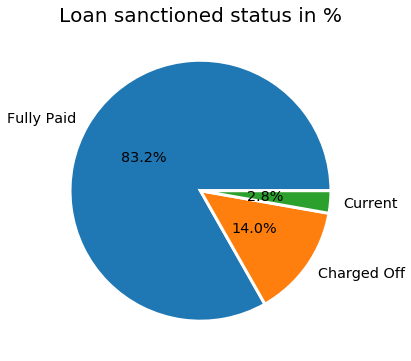

In [20]:
# pie chart function
def print_pie_chart (title, pie_chart_df):
    pie, ax = plt.subplots(figsize=[10,6])
    labels  = pie_chart_df.keys()
    plt.pie(x = pie_chart_df, autopct="%.1f%%", labels=labels, pctdistance=0.5, 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})
    plt.title(title, fontsize=20)
    
#Check the loan status i.e. how many loans were paid
loan_status_pie_chart = round((lending_case['loan_status'].value_counts()/len(lending_case))*100, 2)
print_pie_chart('Loan sanctioned status in %', loan_status_pie_chart)    

#### Categorical variable "Purpose" analysis who defaulted

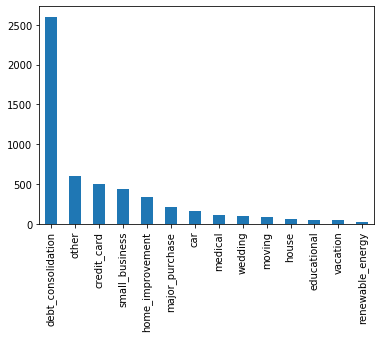

In [21]:

#round((lending_case.groupby(['loan_status']) ['purpose'].value_counts()/len(lending_case))*100, 2)
charged_off_loans = lending_case[(lending_case['loan_status'] == 'Charged Off')]
charged_off_loans['purpose'].value_counts().plot.bar() 
#charged_off_loans['purpose'].value_counts()

#### Further analysis with respective to each purpose
 Find out how many defaulted in each of the category
 Observation: debit_consolidation, credit_card, other, small_business & home improvementcontributes more than anyone else

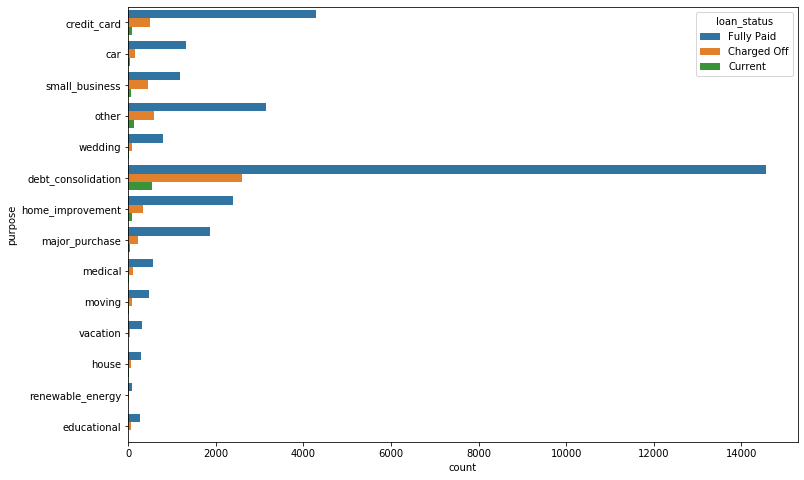

In [22]:
plt.figure(figsize=[12,8])
sns.countplot(y = "purpose", hue="loan_status", data = lending_case)

#### Categocial variable "Home ownership" analysis
 Observation: RENT & MORTAGE contributes alot for defaulted loans

home_ownership  loan_status
MORTGAGE        Fully Paid     13905
                Charged Off     2145
                Current          577
NONE            Fully Paid         3
OTHER           Fully Paid        73
                Charged Off       15
OWN             Fully Paid      2441
                Charged Off      424
                Current           81
RENT            Fully Paid     15091
                Charged Off     2723
                Current          390
Name: loan_status, dtype: int64


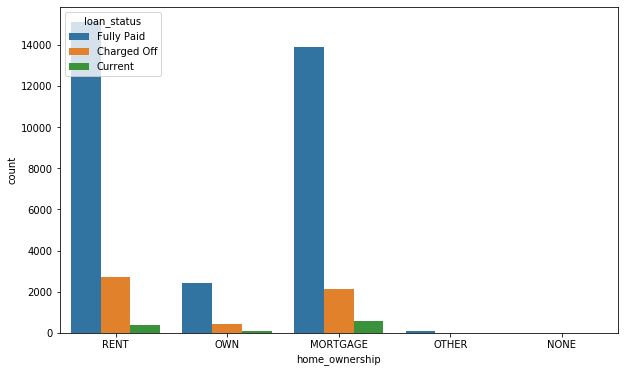

In [23]:
print(lending_case.groupby(['home_ownership'])['loan_status'].value_counts())
plt.figure(figsize=[10,6])
sns.countplot(x = "home_ownership", hue="loan_status", data =lending_case)

### Analysis of quantifier variables.
  loan_amount: funded_amnt will be after approving the loan but before analyzing check the avg.
  interest_rate : analysis box blot
  annual_inc: annual income analysis
  tenure: As the loan applied for specific duration adn unique() function shows only two lets skip it for now

#### Interest rate analysis
we can ignore outliers, use quantile to ignore the percentage column

count    37868.000000
mean        12.015777
std          3.693572
min          5.420000
25%          9.250000
50%         11.860000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64


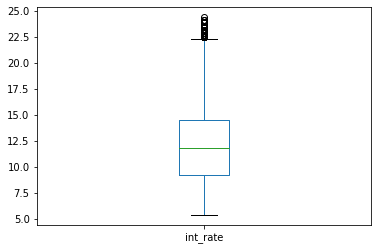

In [24]:
#interest_rate analysis, 
print(lending_case['int_rate'].describe())
lending_case['int_rate'].plot.box()
#99% of people are getting interest rate < 20.00 , lending_case['int_rate'].quantile(0.99), we should ignore the rest

#### loan_amount analysis

count    37868.000000
mean     10844.408207
std       7229.445777
min        500.000000
25%       5000.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


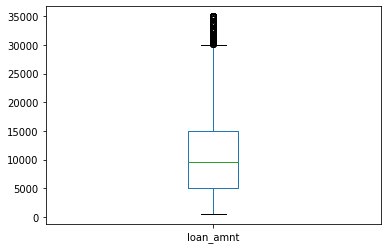

In [25]:
print(lending_case['loan_amnt'].describe())
lending_case['loan_amnt'].plot.box()
#95% of people are less than within limit <= 25000.0 lending_case['loan_amnt'].quantile(0.95)

#### Annual_income analysis

count    3.786800e+04
mean     6.821043e+04
std      6.121633e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.800000e+04
75%      8.100000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


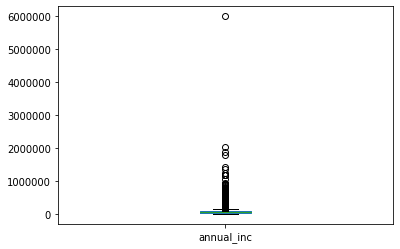

In [26]:
print(lending_case['annual_inc'].describe())
lending_case['annual_inc'].plot.box()

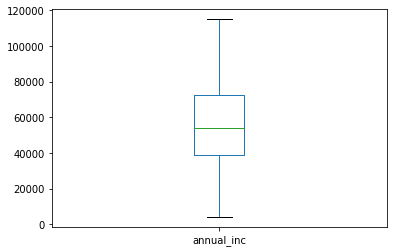

In [27]:
#90% of the people not outliers only top 10% of the people are, we can ignore the top people after checking if they are defaulted
lending_case[(lending_case['annual_inc'] < lending_case['annual_inc'].quantile(0.90))]['annual_inc'].plot.box()

#### Loan amount, funded_amnt & funded_amnt_inv analysis
   Distributions are same it means only one of them can be used, we can use loan_amnt for our analysis

<Figure size 1080x432 with 0 Axes>

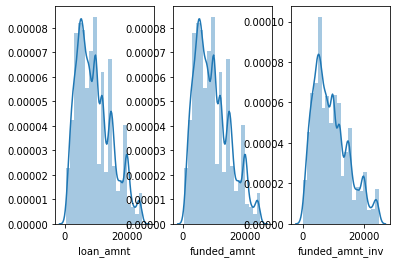

In [28]:
plt.figure(figsize=[15,6])
fig, ax =plt.subplots(1,3)
loan_amnt = lending_case[(lending_case['loan_amnt'] < lending_case['loan_amnt'].quantile(0.95))]
sns.distplot(loan_amnt['loan_amnt'], bins = 20, ax=ax[0])

funded_amnt = lending_case[(lending_case['funded_amnt'] < lending_case['funded_amnt'].quantile(0.95))]
sns.distplot(funded_amnt['funded_amnt'], bins = 20, ax=ax[1])

funded_amnt_inv = lending_case[(lending_case['funded_amnt_inv'] < lending_case['funded_amnt_inv'].quantile(0.95))]
sns.distplot(funded_amnt_inv['funded_amnt_inv'], bins = 20, ax=ax[2])

plt.show()


#### Loan paying term analysis
Charged off loans are same in both 36 & 60 months, and number of Full Paid applicants are more in 36 months

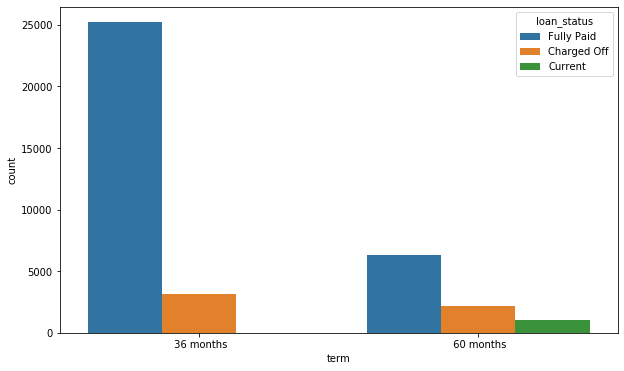

In [29]:
plt.figure(figsize=[10,6])
sns.countplot(x = "term", hue="loan_status", data =lending_case)

#### Categorical variable issue_d analysis

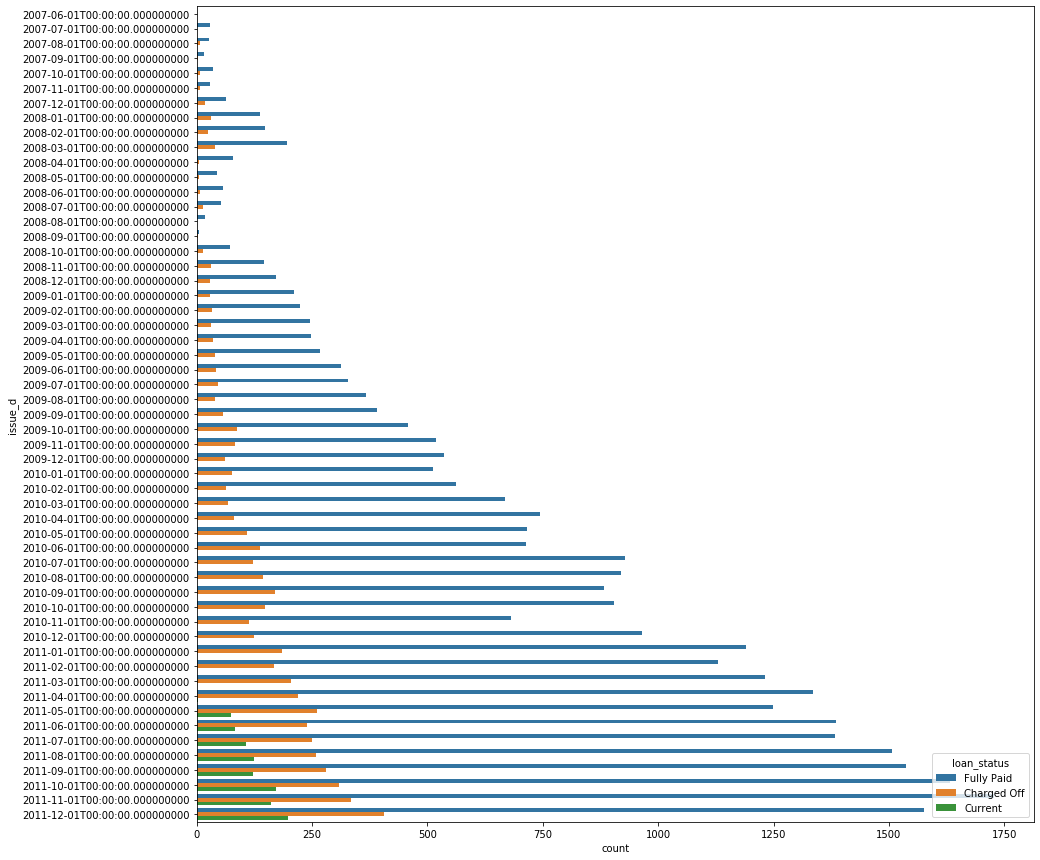

In [30]:
plt.figure(figsize=[15,15])
sns.countplot(y = "issue_d", hue="loan_status", data =lending_case)

#### Categorical variable (derived) issue_d_month analysis
Almost all the months contributes equally and december is the most, one of the reason could be people take higher loans in that month because income tax document submission starts in dec

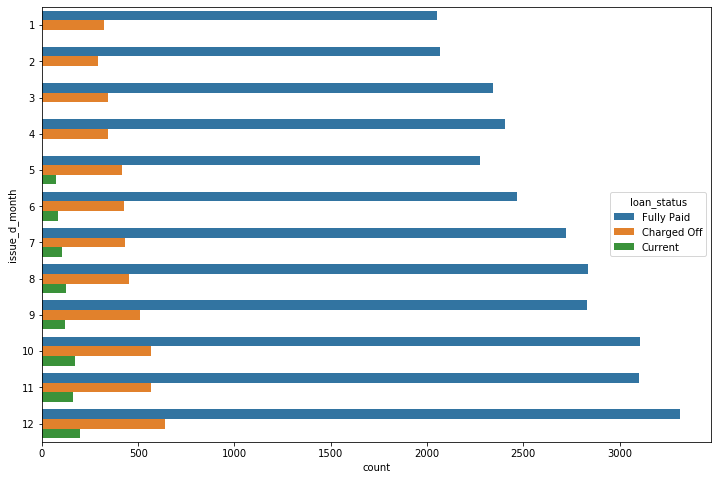

In [31]:
plt.figure(figsize=[12,8])
sns.countplot(y = "issue_d_month", hue="loan_status", data =lending_case)

### Find the relation between variables before proceeding further

In [32]:
lending_case.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,issue_d_year,issue_d_month
id,1.000000,0.143636,0.143636,0.239313,0.068306,0.077759,0.094929,0.010192,0.097398,-0.009397,...,0.105434,0.166968,-0.056380,0.033464,-0.012862,0.117967,NaN,NaN,0.844713,0.413170
loan_amnt,0.143636,1.000000,1.000000,0.958694,0.304068,0.958080,0.159974,0.275606,0.066441,-0.033849,...,0.874690,0.740349,0.046174,0.137571,0.075793,0.454970,NaN,NaN,0.119171,0.057372
funded_amnt,0.143636,1.000000,1.000000,0.958694,0.304068,0.958080,0.159974,0.275606,0.066441,-0.033849,...,0.874690,0.740349,0.046174,0.137571,0.075793,0.454970,NaN,NaN,0.119171,0.057372
funded_amnt_inv,0.239313,0.958694,0.958694,1.000000,0.298102,0.907279,0.168319,0.263961,0.075100,-0.039788,...,0.849960,0.733253,0.027028,0.125631,0.062478,0.444786,NaN,NaN,0.244776,0.084284
int_rate,0.068306,0.304068,0.304068,0.298102,1.000000,0.275539,0.014261,0.050449,0.107343,0.156228,...,0.182320,0.522704,0.092162,0.121757,0.066648,0.153460,NaN,NaN,0.042128,0.056332
installment,0.077759,0.958080,0.958080,0.907279,0.275539,1.000000,0.134669,0.282162,0.055008,-0.021616,...,0.856027,0.639293,0.056257,0.119838,0.076507,0.404841,NaN,NaN,0.044808,0.040898
emp_length,0.094929,0.159974,0.159974,0.168319,0.014261,0.134669,1.000000,0.129679,0.052266,0.013264,...,0.137816,0.129609,-0.015223,0.025336,0.006536,0.081076,NaN,NaN,0.098566,0.023626
annual_inc,0.010192,0.275606,0.275606,0.263961,0.050449,0.282162,0.129679,1.000000,-0.123407,0.022041,...,0.268620,0.188775,0.005507,0.021098,0.015692,0.145313,NaN,NaN,0.010706,0.009428
dti,0.097398,0.066441,0.066441,0.075100,0.107343,0.055008,0.052266,-0.123407,1.000000,-0.032782,...,0.043176,0.106144,-0.011689,0.024741,0.011046,0.004850,NaN,NaN,0.096943,0.020820
delinq_2yrs,-0.009397,-0.033849,-0.033849,-0.039788,0.156228,-0.021616,0.013264,0.022041,-0.032782,1.000000,...,-0.040087,0.020776,0.027146,0.011442,0.011439,-0.012758,NaN,NaN,-0.003904,-0.009280


In [33]:
#correlation matrix prints additional columsn where NAN matrix was determined
additional_colums_to_drop = ['policy_code', 'acc_now_delinq'] #['acc_now_delinq']
lending_case = lending_case.drop(columns = additional_colums_to_drop)
print("Shape after dropping columns with all missing values :: ", lending_case.shape)


Shape after dropping columns with all missing values ::  (37868, 45)


#### Heat matrix between numerical variables

In [34]:
corr_matrix_column = ['loan_amnt', 'funded_amnt', 'total_pymnt', 'total_pymnt_inv', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'issue_d_year', 'issue_d_month']
lending_case_corr = lending_case[corr_matrix_column]
lending_case_corr.corr()

,loan_amnt,funded_amnt,total_pymnt,total_pymnt_inv,int_rate,emp_length,annual_inc,dti,issue_d_year,issue_d_month
loan_amnt,1.000000,1.000000,0.906503,0.873721,0.304068,0.159974,0.275606,0.066441,0.119171,0.057372
funded_amnt,1.000000,1.000000,0.906503,0.873721,0.304068,0.159974,0.275606,0.066441,0.119171,0.057372
total_pymnt,0.906503,0.906503,1.000000,0.970702,0.301133,0.146784,0.265782,0.065944,0.119614,0.046525
total_pymnt_inv,0.873721,0.873721,0.970702,1.000000,0.296382,0.154804,0.255952,0.072825,0.223810,0.069734
int_rate,0.304068,0.304068,0.301133,0.296382,1.000000,0.014261,0.050449,0.107343,0.042128,0.056332
emp_length,0.159974,0.159974,0.146784,0.154804,0.014261,1.000000,0.129679,0.052266,0.098566,0.023626
annual_inc,0.275606,0.275606,0.265782,0.255952,0.050449,0.129679,1.000000,-0.123407,0.010706,0.009428
dti,0.066441,0.066441,0.065944,0.072825,0.107343,0.052266,-0.123407,1.000000,0.096943,0.020820
issue_d_year,0.119171,0.119171,0.119614,0.223810,0.042128,0.098566,0.010706,0.096943,1.000000,-0.019120
issue_d_month,0.057372,0.057372,0.046525,0.069734,0.056332,0.023626,0.009428,0.020820,-0.019120,1.000000


### Observation from. heat map between numerical variable
#### positive correlationship
  1. emp_length & loan_amnt  : more experience employee can take high loan
  2. loan_amt & annual_income: more loan is allowed for higher annual income
  3. loan_amnt & int_rate : higher interest rate & loan_amnt (if person is defaulted, more loss for the firm)  

#### negative correlationship
  1. dti & annual_income  : low debt ratio for higher annual income

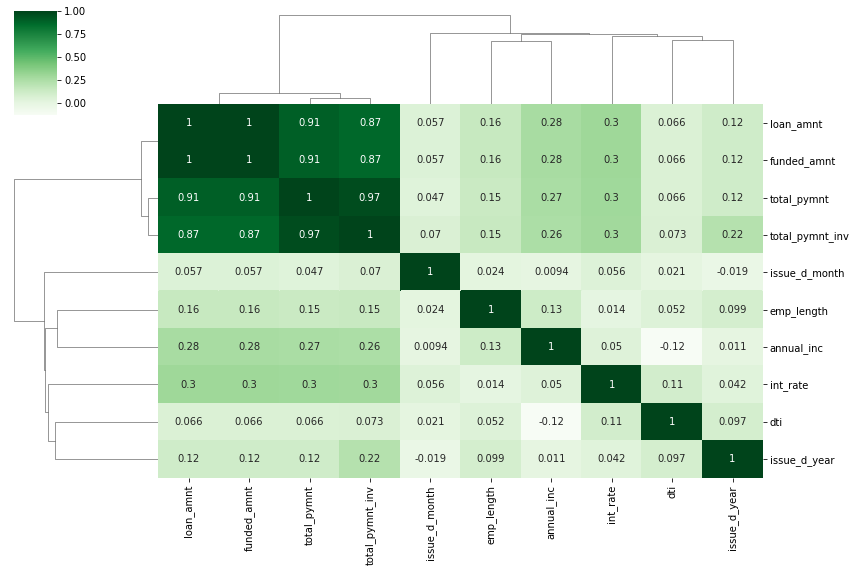

In [35]:
loan_correlation = lending_case[corr_matrix_column].corr()
sns.clustermap(loan_correlation, annot=True, figsize=(12, 8), cmap = "Greens")
plt.show()

## Bi-variate analysis Charged off vs
    1) annual_income
    2) purpose
    3) grade vs sub grade
    4) interest rate
    5) employee_length
    6) address 
    7) verification
    8) public bankruptcies 
    
  multiple variable analyis   

#### Charged-off vs annual_income
Qcut try to euqally divide the values lets not use id
With pd.cut it shows only 2/3 records are above 80,0000

In [36]:
#annual income range
#lending_case['annual_inc'].describe()
bins = [0, 250000, 500000, 750000, 1000000, 1250000]
labels = ['0-250,000', '250,000-500,000', '500,000-750,000', '750,000-1000,000', '1000,000(+)']
lending_case['annual_inc_range'] = pd.cut(lending_case['annual_inc'], bins, labels)
#lending_case['annual_inc_range'].unique()

In [37]:
#interest rate range
#lending_case['int_rate'].describe()
bins = [0, 5.0, 10.0, 15.0, 20.0, 25.0]
labels = ['0-5.0', '5.0-10.0', '10.0-15.0', '15.0-20.0', '20.0-25.0']
lending_case['int_rate_range'] = pd.cut(lending_case['int_rate'], bins, labels)
#lending_case['int_rate'].unique()

In [38]:
#loan amount range
#lending_case['int_rate'].describe()
bins = [0, 7000.0, 14000.0, 21000.0, 28000.0, 35000.0]
labels = ['0-7,000.0', '7,000.0-14,000.0', '14,000.0-21,000.0', '21,000.0-28,000.0', '28,000.0-35,000.0']
lending_case['loan_amnt_range'] = pd.cut(lending_case['loan_amnt'], bins, labels)
#lending_case['loan_amnt_range'].unique()

In [39]:
#Create a new dataframe charged off  to check the statuses
co_lending_case = lending_case[(lending_case['loan_status'] == 'Charged Off')]

#### Charged off vs annual_income
<font color="red">
 Bin the annual income in range with cut and plot the count plot graph
 <ul> <li> Most of the defaulted loans are in annual income range of 0-250K i.e. people with higer income can easily pay the loan </li> </ul>
</font>

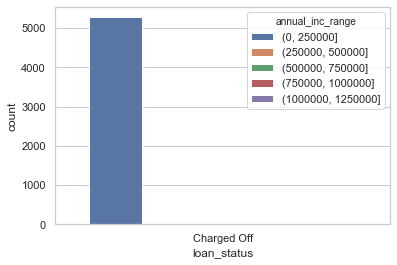

In [47]:
sns.set(style="whitegrid")
sns.countplot(x = "loan_status", hue="annual_inc_range", data = co_lending_case)

#### Charged off vs purpose
<font color="red"> Highest defaulted loan were in debt_consolidation, other, credit_card followed by small_business</font>

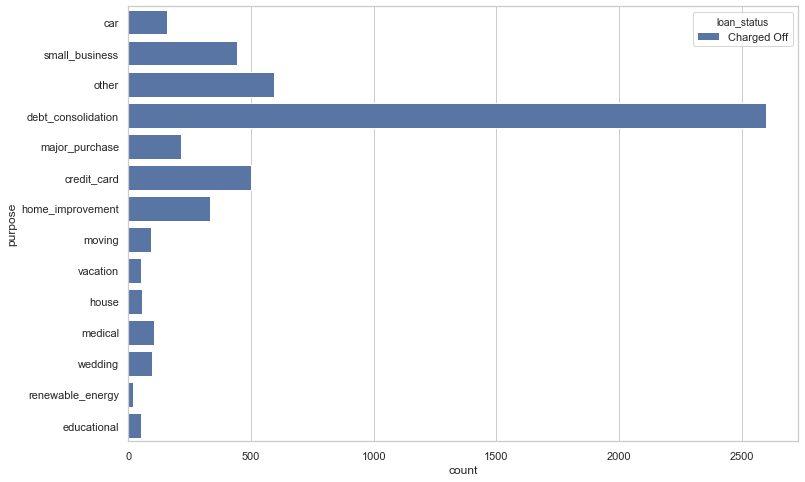

In [52]:
plt.figure(figsize=[12,8])
sns.countplot(y = "purpose", hue="loan_status", data = co_lending_case)

#### Charged off vs Interest rate
<font color="red"> Highest interest rate for defaulted loan bar chart</font>

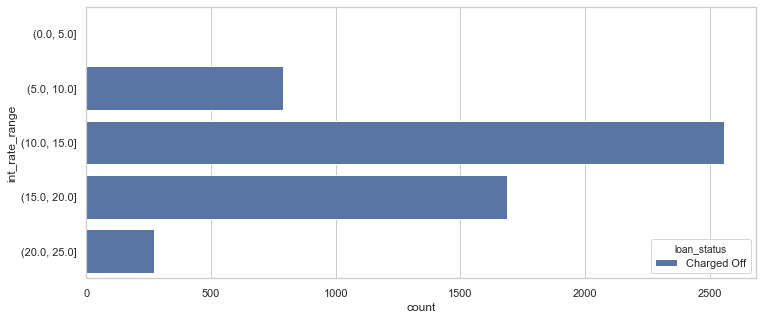

In [56]:
plt.figure(figsize=[12,5])
sns.countplot(y = "int_rate_range", hue="loan_status", data = co_lending_case)

#### Charged off vs employee length
6) address 
7) verification
8) public bankruptcies 

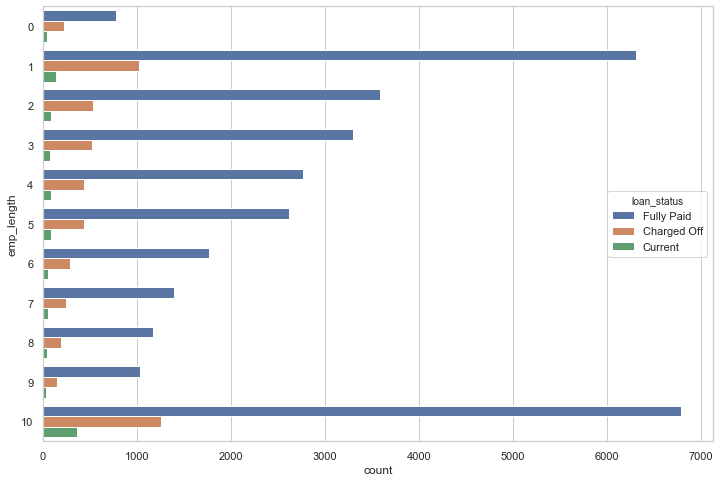

In [62]:
plt.figure(figsize=[12,8])
sns.countplot(y = "emp_length", hue="loan_status", data = lending_case)

## Bi-variate
    1. Loan amount vs purpose of loan
    2. Interest rate vs Term of loan
    3. Grade vs Interest Rate
    4. Year vs interest rate
    5. Loan amount vs Interest rate
    6. Dti vs interest rate
    7. Recoveries vs Annual income
    8. Annual income across grade and loan status

#### Loan amount vs purpose of loan
highest loan amount in (90-95 percentile) was taken for small_business followed by debit_consolidation and credit_case
median (majority of 50%) was loan taken in debt_consolidation followed by credit_card, small_business, house

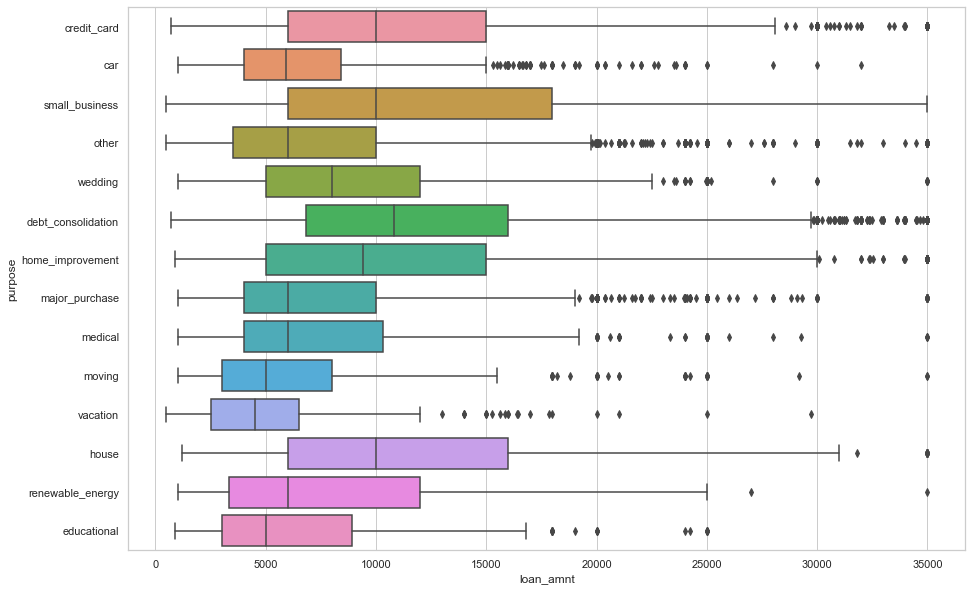

In [71]:
#lending_case[['loan_amnt', 'purpose']]

plt.figure(figsize=[15,10])
sns.boxplot(lending_case['loan_amnt'], lending_case['purpose'])
plt.show()

#### Interest rate vs Term of loan
<font color='red'> Loan taken for 60 months has higher interest rate as chances of defaulting may be higher </font>

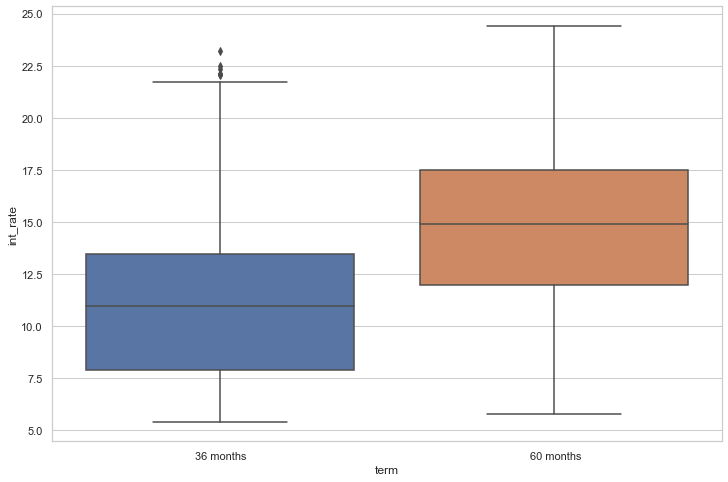

In [72]:
#lending_case[['int_rate', 'term']]
plt.figure(figsize=[12,8])
sns.boxplot(lending_case['term'], lending_case['int_rate'])
plt.show()

#### Grade vs Interest Rate
<font color="red"> loans with bad grade i.e. higher risk has high interest rate </font>

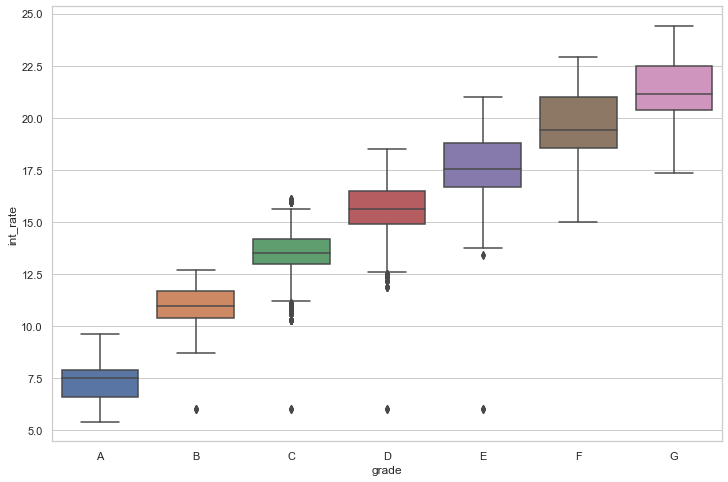

In [73]:
plt.figure(figsize=[12,8])
sns.boxplot(lending_case['grade'].sort_values(ascending=True), lending_case['int_rate'])
plt.show()

#### Year vs interest rate
<font color="red"> 
    <ul>
        <li>As the year progresses interest rate bars keep increasing. possibility economoies increasing.</li>
    <li>25% percentile was almost at the same level as the people income kept increasing </li>
        </ul><font>

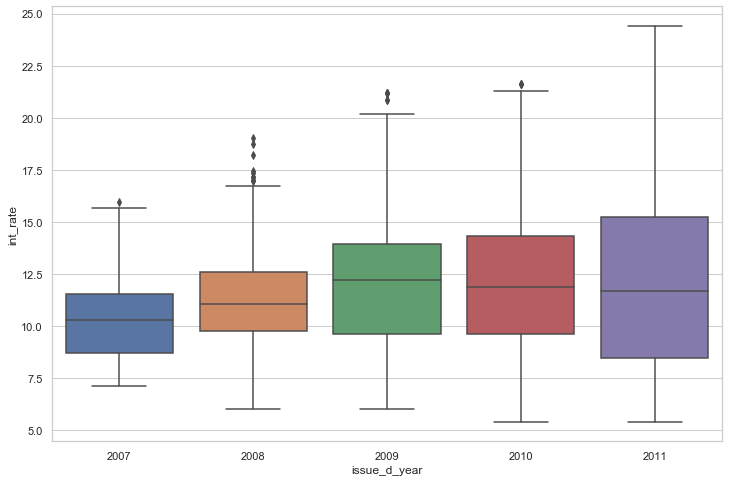

In [75]:
plt.figure(figsize=[12,8])
sns.boxplot(lending_case['issue_d_year'].sort_values(ascending=True), lending_case['int_rate'])
plt.show()